## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier, export_graphviz


# For reproducible results
RANDOM_STATE_SEED = 420

In [2]:
df_dataset = pd.read_csv("processed_dataset.csv")
df_dataset





,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [3]:
df_dataset

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [4]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

False
True


In [5]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dataset.dropna(inplace=True)

In [6]:
print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

False
False


In [7]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363855 entries, 0 to 1364017
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1363855 non-null  int64  
 1   Tot Fwd Pkts       1363855 non-null  int64  
 2   Tot Bwd Pkts       1363855 non-null  int64  
 3   TotLen Fwd Pkts    1363855 non-null  int64  
 4   TotLen Bwd Pkts    1363855 non-null  float64
 5   Fwd Pkt Len Max    1363855 non-null  int64  
 6   Fwd Pkt Len Min    1363855 non-null  int64  
 7   Fwd Pkt Len Mean   1363855 non-null  float64
 8   Fwd Pkt Len Std    1363855 non-null  float64
 9   Bwd Pkt Len Max    1363855 non-null  int64  
 10  Bwd Pkt Len Min    1363855 non-null  int64  
 11  Bwd Pkt Len Mean   1363855 non-null  float64
 12  Bwd Pkt Len Std    1363855 non-null  float64
 13  Flow Byts/s        1363855 non-null  float64
 14  Flow Pkts/s        1363855 non-null  float64
 15  Flow IAT Mean      1363855 non-n

In [8]:
y = np.array(df_dataset.pop('Label'))
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [9]:
X = np.array(df_dataset)
X

array([[1.41385000e+05, 9.00000000e+00, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.81000000e+02, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79824000e+05, 1.10000000e+01, 1.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12640543e+08, 3.00000000e+00, 0.00000000e+00, ...,
        7.77817459e+00, 5.63000000e+07, 5.63000000e+07],
       [4.10000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
print(df_dataset.shape)
print(X.shape)
print(y.shape)

(1363855, 76)
(1363855, 76)
(1363855,)


In [11]:
pato = pd.DataFrame(X)
pato

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363850,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1363851,37.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1363852,112640543.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0
1363853,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [15]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363855 entries, 0 to 1364017
Data columns (total 76 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1363855 non-null  int64  
 1   Tot Fwd Pkts       1363855 non-null  int64  
 2   Tot Bwd Pkts       1363855 non-null  int64  
 3   TotLen Fwd Pkts    1363855 non-null  int64  
 4   TotLen Bwd Pkts    1363855 non-null  float64
 5   Fwd Pkt Len Max    1363855 non-null  int64  
 6   Fwd Pkt Len Min    1363855 non-null  int64  
 7   Fwd Pkt Len Mean   1363855 non-null  float64
 8   Fwd Pkt Len Std    1363855 non-null  float64
 9   Bwd Pkt Len Max    1363855 non-null  int64  
 10  Bwd Pkt Len Min    1363855 non-null  int64  
 11  Bwd Pkt Len Mean   1363855 non-null  float64
 12  Bwd Pkt Len Std    1363855 non-null  float64
 13  Flow Byts/s        1363855 non-null  float64
 14  Flow Pkts/s        1363855 non-null  float64
 15  Flow IAT Mean      1363855 non-n

In [ ]:
# pienso que aqui tengo que agregar uso de baja los valores
# no, tengo que hacer despues de la separacion X e Y

In [ ]:
# TEMP
len(df_dataset.columns)

In [ ]:
# print(df_X.shape)
# print(df_y.shape)

In [16]:
# train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=RANDOM_STATE_SEED)

In [17]:
print(df_dataset.shape)

print("TRAIN:")
print(X_train.shape)
print(y_train.shape)

print("TEST")
print(X_test.shape)
print(y_test.shape)

(1363855, 76)
TRAIN:
(913782, 76)
(913782,)
TEST
(450073, 76)
(450073,)


In [18]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [19]:
hyperparameters = {
    'max_depth': [i for i in range(1, 20)]
}

In [20]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [21]:
%%time
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [22]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9997953559752043
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 12}
---------------
DecisionTreeClassifier(max_depth=12)


In [23]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=12)

In [24]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
print(accuracy_score(y_test, predictions))

0.9997889231302478


In [27]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[354488     63]
 [    32  95490]]


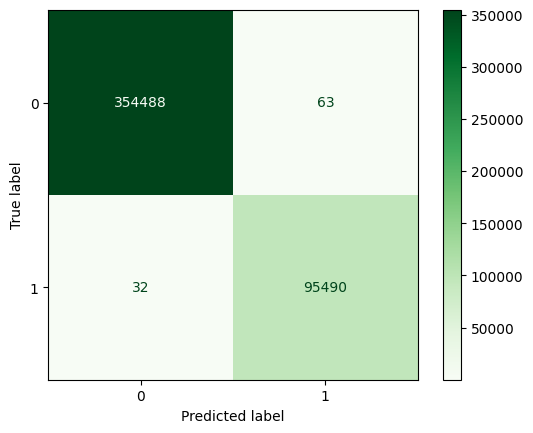

In [34]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.Greens)

In [ ]:
# import sklearn
# print('The scikit-learn version is {}.'.format(sklearn.__version__))

In [ ]:
# def visualize_tree(tree, feature_names):
#     """Create tree png using graphviz.

#     Args
#     ----
#     tree -- scikit-learn DecsisionTree.
#     feature_names -- list of feature names.
#     """
#     with open("dt.dot", 'w') as f:
#         export_graphviz(tree, out_file=f,
#                         feature_names=feature_names)

#     command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
#     try:
#         subprocess.check_call(command)
#     except:
#         exit("Could not run dot, ie graphviz, to "
#              "produce visualization")

# df_dataset_ori = pd.read_csv("processed_dataset.csv")
# features =list(df_dataset_ori.columns)
# features

# visualize_tree(clf.best_estimator_, features)

# # import graphviz
# # graphviz.Source.from_file('algo.dot')  not working

In [ ]:
# from sklearn import tree
# text_representation = tree.export_text(clf)
